# Parameters tuning for Gaussian reward distributions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
def M_estimator_LIL(n, σ=1., α=1., ν=.2):
    """
    Our bound
    """
    δ = ((np.sqrt(16*ν+9)-3)/16)**2
    return (4*σ/α)*np.sqrt((np.log(np.log(n))+np.log(15/δ))/n)

On the interval [-0.5, 0.5], the function $\Phi$ is $\alpha$-strongly convex with $alpha=2f(0.5)$ where $f$ is the density of a Laplace random variable.

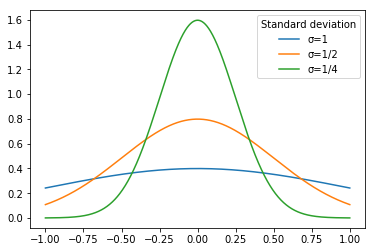

In [3]:
from scipy.stats import norm

x = np.linspace(-1, 1, 1000)

plt.plot(x, norm.pdf(x, loc=0, scale=1), label='σ=1')
plt.plot(x, norm.pdf(x, loc=0, scale=.5), label='σ=1/2')
plt.plot(x, norm.pdf(x, loc=0, scale=.25), label='σ=1/4')
plt.legend(title='Standard deviation')

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in sqrt
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in less_equal
  This is separate from the ipykernel package so we can avoid doing imports until


Smallest n_0 : 790.0


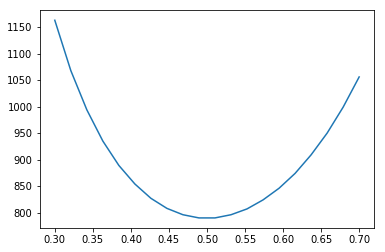

In [4]:
def get_constants(r):
    α = 2*norm.pdf(x=r, loc=0, scale=.5)
    n_0 = np.argmax(M_estimator_LIL(n=np.linspace(1, 100000, 100000), α=α)<=r)
    return(n_0)

r_values = np.linspace(0.3, .7, 20)

n_0 = np.zeros(len(r_values))

for i_r, r in enumerate(r_values):
    n_0[i_r] = get_constants(r)
    
plt.plot(r_values, n_0)
print("Smallest n_0 : {}".format(min(n_0)))

Final choice : $r=0.5, n_0=432$ and $\alpha=0.97$